<a href="https://colab.research.google.com/github/leejunho12316/BookFlex/blob/master/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_%EB%B3%B5%EC%8A%B5/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_6_3_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt

def draw_fruits(arr):
  num = len(arr)
  row = int(np.ceil(num/10))
  col = num if row < 2 else 10

  fig, axs = plt.subplots(row, col, squeeze=False)
  for i in range(row):
    for j in range(col):
      if i*10 + j < num:
        axs[i, j].imshow(arr[i*10 + j])
        axs[i, j].axis('off')

#데이터 다운로드

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-02-28 01:44:07--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-02-28 01:44:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-02-28 01:44:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [3]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100 * 100)

#주성분 분석

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=0.5)

(50, 10000)
(2, 10000)


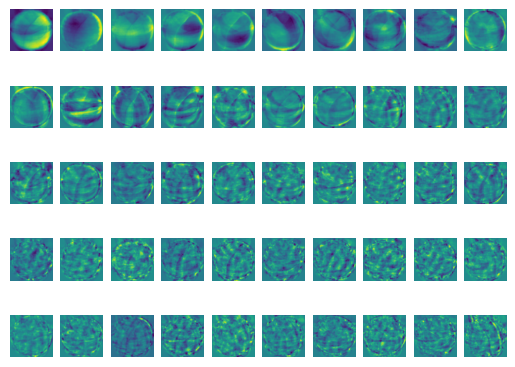

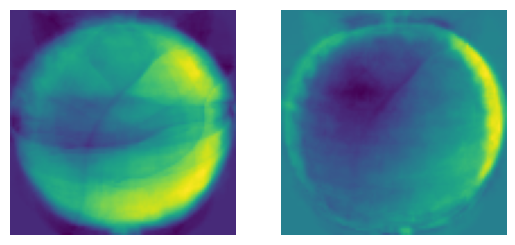

In [19]:
print(pca.components_.shape)
draw_fruits(pca.components_.reshape(-1, 100, 100))

#주성분으로 만들었다 재구성하기

In [21]:
#원본 데이터 주성분으로 표현하기
fruits_pca = pca.transform(fruits_2d)
print("fruits_pca shape : ", fruits_pca.shape)



fruits_pca shape :  (300, 50)
fruits_pca_ratio shape :  (300, 2)


In [24]:
#주성분 데이터 재구성하기
fruits_inverse = pca.inverse_transform(fruits_pca)
print("fruits_inverse shape : ", fruits_inverse.shape)

fruits_inverse shape :  (300, 10000)
fruits_inverse_ratio shape :  (300, 10000)


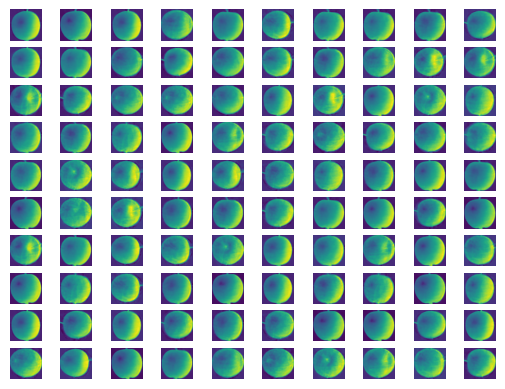

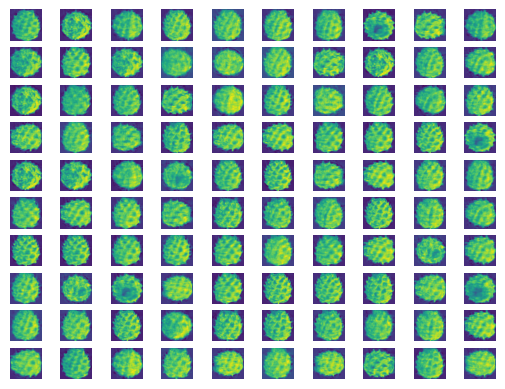

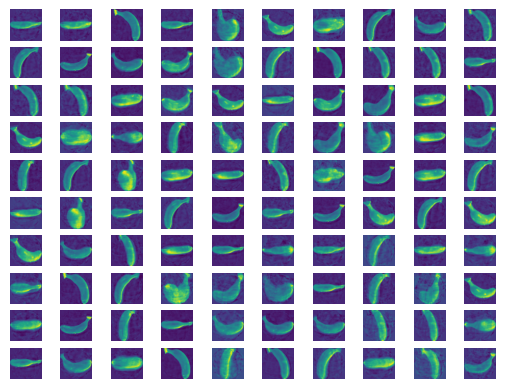

In [8]:
for start in [0, 100, 200]:
  draw_fruits(fruits_inverse[start: start + 100].reshape(-1, 100, 100))

PCA n_components 분산 개수 만큼의 분산 값.
[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511202
 0.00486383 0.00480339 0.00447831 0.00437319 0.00408038 0.00389476
 0.00372442 0.00359282 0.00331451 0.00317859 0.00304308 0.00303738
 0.00288923 0.00275665 0.00264926 0.002557   0.00251825 0.00247351
 0.00239603 0.00230937 0.00222093 0.00216759 0.00213557 0.00196033
 0.00192741 0.00189633 0.00183911 0.00182616 0.00174096 0.00168281
 0.00164039 0.0016009 ]
총합 :  0.921565398863387


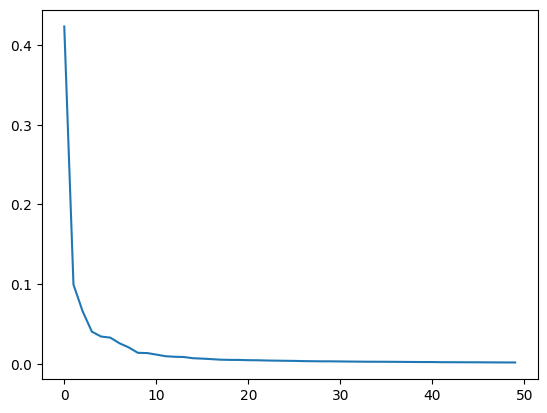

In [9]:
#설명된 분산
print("PCA n_components 분산 개수 만큼의 분산 값.")
print(pca.explained_variance_ratio_)
print("총합 : ", np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

#지도 학습

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

scores_normal = cross_validate(lr, fruits_2d, target)
scores_pca = cross_validate(lr, fruits_pca, target)

print('Normal:', np.mean(scores_normal['test_score']))
print('Normal time:', np.mean(scores_normal['fit_time']))
print('PCA', np.mean(scores_pca['test_score']))
print('PCA time:', np.mean(scores_pca['fit_time']))

Normal: 0.9966666666666667
Normal time: 1.3323431491851807
PCA 0.9966666666666667
PCA time: 0.01413102149963379


#분산 비율로 PCA 모델 만들기

학습된 PCA shape (2, 10000)
fruits_pca_ratio shape :  (300, 2)
fruits_inverse_ratio shape :  (300, 10000)


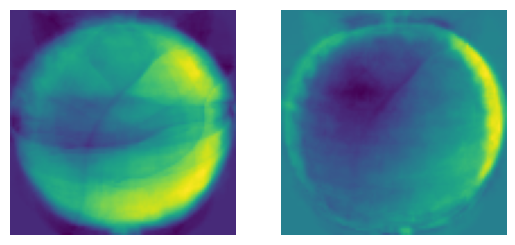

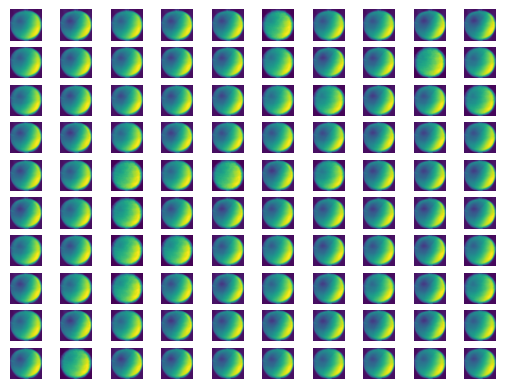

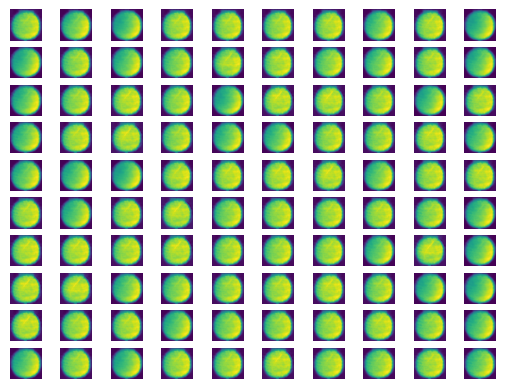

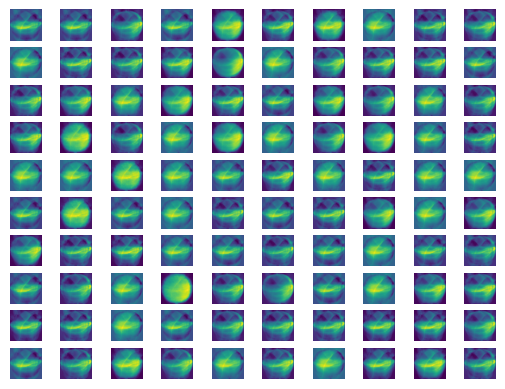

In [27]:
pca_ratio = PCA(n_components=0.5)
pca_ratio.fit(fruits_2d)

print("학습된 PCA shape", pca_ratio.components_.shape)
draw_fruits(pca_ratio.components_.reshape(2, 100, 100))

#주성분으로 바꿨다 재구성하기
fruits_pca_ratio = pca_ratio.transform(fruits_2d)
print("fruits_pca_ratio shape : ",fruits_pca_ratio.shape)
fruits_inverse_ratio = pca_ratio.inverse_transform(fruits_pca_ratio)
print("fruits_inverse_ratio shape : ", fruits_inverse_ratio.shape)

for start in [0, 100, 200]:
  draw_fruits(fruits_inverse_ratio[start : start + 100].reshape(-1, 100, 100))

In [33]:
print(pca_ratio.n_components, pca_ratio.n_components_)
scores_normal = cross_validate(lr, fruits_pca, target)
scores_pca_ratio = cross_validate(lr, fruits_pca_ratio, target)

print('Normal score : ', np.mean(scores_normal['test_score']))
print('Normal time : ', np.mean(scores_normal['fit_time']))
print('PCA ratio score : ', np.mean(scores_pca_ratio['test_score']))
print('PCA ratio score : ', np.mean(scores_pca_ratio['fit_time']))

0.5 2
Normal score :  0.9966666666666667
Normal time :  0.010593271255493164
PCA ratio score :  0.9933333333333334
PCA ratio score :  0.01902608871459961


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

주성분 분석 후 KMeans로 클러스터링

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


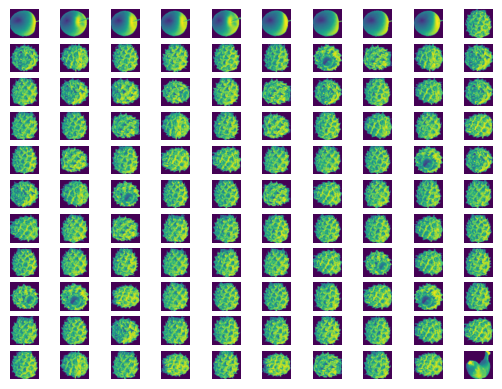

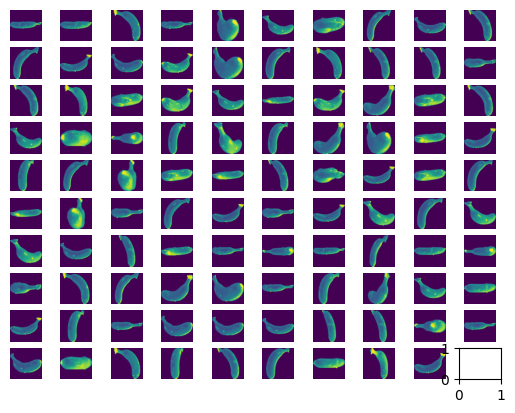

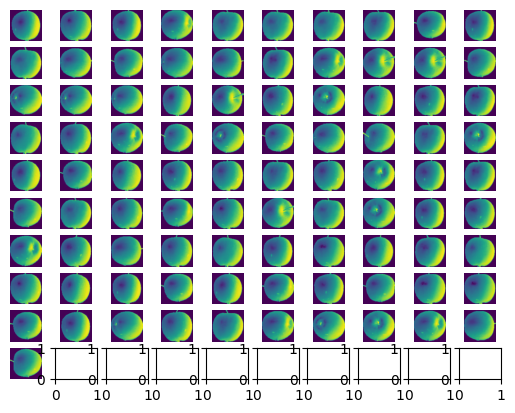

In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_pca_ratio)
print(km.labels_)
print(np.unique(km.labels_, return_counts = True))

for i in [0, 1, 2]:
  draw_fruits(fruits[km.labels_ == i])


2차원으로 표현하기

In [47]:
data = fruits_pca_ratio[km.labels_ == 0]
data[:10]

array([[ 1556.73860341,  -123.05166122],
       [ 2641.95018377,  -503.74908687],
       [ 2063.01348637,  -545.3329997 ],
       [ 2031.32316791,  -471.87328056],
       [ 2860.74601791,  -153.99802671],
       [ 1682.34573388,   -98.03361015],
       [ 1619.90106151,    24.24074041],
       [ 1522.5025055 ,  -129.48517411],
       [ 1755.67284459,  -146.01002247],
       [ 2748.52503988, -2125.98363271]])

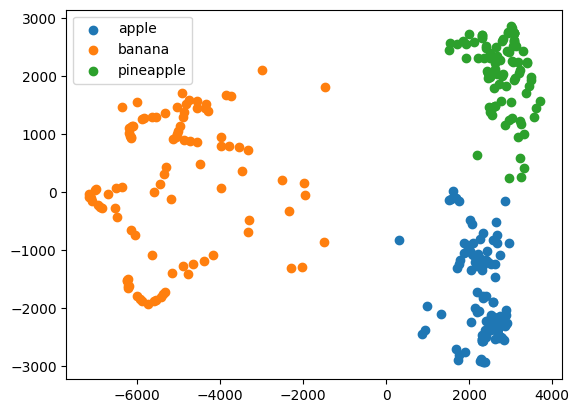

In [50]:
for label in range(0, 3):
  data = fruits_pca_ratio[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()